In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from utilities import load_matlab_data, rmse
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [3]:
x, y = load_matlab_data('data/hwkdataNEW.mat')
xt, xv, yt, yv = train_test_split(x, y)

In [45]:
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('plsr', PLSRegression())
])
hyperparameters = {
    'poly__degree': [i for i in range(1, 4)],
    'plsr__n_components': [i for i in range(1, xt.shape[1])]
}
model = GridSearchCV(pipe, hyperparameters, scoring=make_scorer(rmse, greater_is_better=False))

In [46]:
model.fit(xt, yt)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('plsr', PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2, 3], 'plsr__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmse, greater_is_better=False), verbose=0)

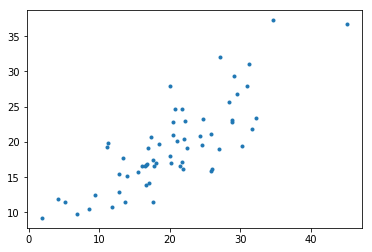

In [47]:
plt.plot(yv, model.predict(xv), '.')
plt.show()

In [48]:
model.cv_results_

{'mean_fit_time': array([ 0.00149608,  0.00292889,  0.01547201,  0.00118367,  0.0033586 ,
         0.01215537,  0.00135104,  0.00366894,  0.01316714,  0.00150267,
         0.00311462,  0.01472457,  0.00165343,  0.00338364,  0.01552375,
         0.0018065 ,  0.0036389 ,  0.0145026 ,  0.00234564,  0.00420403,
         0.01533437,  0.00209649,  0.00405232,  0.01579428,  0.00238657,
         0.0042367 ,  0.01891041,  0.00242607,  0.00438039,  0.01983937,
         0.00276764,  0.0049293 ,  0.01742832,  0.00308665,  0.00507251,
         0.01788044,  0.00307894,  0.00528622,  0.01867803]),
 'std_fit_time': array([  3.75056650e-04,   6.97167706e-05,   1.32207718e-03,
          7.44238615e-05,   4.39292168e-04,   1.87720917e-04,
          2.06323544e-05,   6.37574740e-04,   4.37386318e-04,
          6.15561292e-05,   3.40086273e-05,   1.39505291e-03,
          4.21576367e-05,   7.42910150e-05,   1.73579119e-03,
          5.04422949e-05,   6.46802650e-05,   3.28030484e-04,
          2.74593923e-

In [ ]:
plt.plot(model.param_grid['plsr__n_components'], 
         np.abs(model.cv_results_['mean_test_score']), 
         label="Testing error")
plt.plot(model.param_grid['plsr__n_components'], 
         np.abs(model.cv_results_['mean_train_score']), 
         label="Training error")
plt.legend(loc="upper right")
plt.xlabel("Number of latent variables")
plt.ylabel("RMSE")
plt.show()

In [49]:
model.param_grid

{'poly__degree': [1, 2, 3],
 'plsr__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

In [50]:
model.best_estimator_

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('plsr', PLSRegression(copy=True, max_iter=500, n_components=8, scale=True, tol=1e-06))])

In [52]:
np.max(model.cv_results_['mean_test_score'])

-3.8928878980239441

In [68]:
rfecv = RFECV(LinearRegression(), scoring=make_scorer(rmse))

In [69]:
rfecv.fit(xt, yt.ravel())

RFECV(cv=None,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring=make_scorer(rmse), step=1, verbose=0)

In [70]:
rfecv.grid_scores_

array([ 6.6501663 ,  5.12814321,  5.08010911,  5.10461167,  4.1686787 ,
        4.00822096,  4.05126764,  4.0455882 ,  4.01408512,  4.02448145,
        3.97374147,  3.95357811,  3.95553832,  3.94826708])

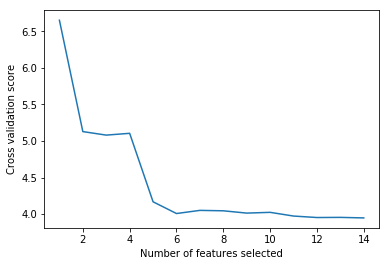

In [72]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()